##Authentication of wireless devices using radio frequency fingerprints by Neural Network

**تایید هویت دستگاه های بیسیم بااستفاده از اثر انگشت فرکانس رادیویی **

**در این پروژه سعی گردیده تا روشی کارا مبتنی بر هوش مصنوعی جهت تعیین ، تغییر هویت  دستگاه‌های مجاز از دستگاه‌های غیرمجاز که تلاش در تغییر هویت خود جهت ورود به شبکه ی محلی را دارند شناسایی کرده و از ورود دستگاه‌های غیر مجاز به این شبکه امن جلوگیری شود.امروزه روش‌های احراز هویت  متعددی مانند احراز هویت مبتنی بر رمز عبور، احراز هویت مبتنی بر گواهی و .. وجود دارد. روش ارائه شده ، احراز هویت بر اساس اثرانگشت فرکانس رادیویی دستگاه های بیسیم  و مدل بندی آنها با الگوریتم های یادگیری ماشین  می باشد . در این مطالعه تجربی ، از پایگاه داده با 12000 داده  که دارای 103 ویژگی  می باشند و توسط دستگاه گیرنده رادیویی Hack RF One در مرکز شهید باقری سازمان جهاد خودکفایی سپاه انجام پذیرفته، استفاده گردیده **

##**Import Package**

In [ ]:
#Enter the required package
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,balanced_accuracy_score,recall_score
from sklearn import metrics
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
#import Data
!gdown --id 1W7v3NevY_SgZoCnh78rEwUVyvk3X91Qv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1W7v3NevY_SgZoCnh78rEwUVyvk3X91Qv
To: /content/Test1to5.csv
100% 9.19M/9.19M [00:00<00:00, 34.5MB/s]


In [ ]:
#read csv file
data = pd.read_csv('/content/Test1to5.csv')

In [ ]:
data.head()

,Phi_n1,F_n1,Mean1,STD1,SKW1,KUR1,Phi_n2,F_n2,Mean2,STD2,...,STD16,SKW16,KUR16,Phi_n17,F_n17,Mean17,STD17,SKW17,KUR17,Label
0,0.999141,0.000000,-0.015057,0.099842,0.001906,2.779727,0.999188,0.00000,-0.018842,0.099018,...,0.098440,0.011043,2.850505,0.999437,0.000040,-0.013404,0.103701,-0.006983,2.818394,M5
1,0.999313,0.000027,0.000350,0.243067,-0.523430,11.148045,0.999000,-0.00007,-0.013981,0.099325,...,0.099466,-0.011725,2.711773,0.999313,0.000040,-0.018143,0.099947,-0.003501,2.803524,M5
2,0.999250,-0.000010,-0.014142,0.100139,-0.001865,2.779996,0.999375,0.00001,-0.016759,0.097628,...,0.102085,-0.009160,2.855898,0.998687,-0.000119,-0.013197,0.098552,0.000495,2.742172,M5
3,0.999105,-0.000023,-0.015235,0.153331,-0.319403,24.730970,0.998938,0.00004,-0.013445,0.099671,...,0.100696,-0.017397,2.779726,0.999313,0.000000,-0.039500,0.474353,-0.025455,4.216886,M5
4,0.999309,0.000032,-0.015633,0.150284,1.360318,22.540028,0.999812,0.00008,-0.074362,0.456864,...,0.098123,0.013880,2.762814,0.999062,-0.000060,-0.014359,0.100035,0.025354,2.748237,M5


In [ ]:
#مشخص کردن ستون ها
data.columns

Index(['Phi_n1', 'F_n1', 'Mean1', 'STD1', 'SKW1', 'KUR1', 'Phi_n2', 'F_n2',
       'Mean2', 'STD2',
       ...
       'STD16', 'SKW16', 'KUR16', 'Phi_n17', 'F_n17', 'Mean17', 'STD17',
       'SKW17', 'KUR17', 'Label'],
      dtype='object', length=103)

In [ ]:
data.describe()


,Phi_n1,F_n1,Mean1,STD1,SKW1,KUR1,Phi_n2,F_n2,Mean2,STD2,...,Mean16,STD16,SKW16,KUR16,Phi_n17,F_n17,Mean17,STD17,SKW17,KUR17
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.999002,7.907750e-09,-0.013134,0.140551,0.044696,7.915667,0.998999,8.467672e-07,-0.012127,0.107837,...,-0.013130,0.107417,0.006383,2.845538,0.998994,-0.000001,-0.014310,0.108401,0.003114,2.857259
std,0.000192,2.373898e-05,0.009456,0.066359,0.595578,6.833200,0.000361,6.257780e-05,0.053934,0.091056,...,0.057607,0.089381,0.137556,0.636025,0.000358,0.000064,0.053044,0.092553,0.148357,0.778777
min,0.998445,-8.700000e-05,-0.066114,0.076449,-4.292039,2.644673,0.997625,-3.580990e-04,-0.808991,0.073991,...,-0.847495,0.073769,-2.240644,1.156095,0.997625,-0.000249,-0.875493,0.074250,-3.368397,1.160512
25%,0.998867,-1.680000e-05,-0.014115,0.086361,-0.004183,2.824920,0.998750,-3.980000e-05,-0.013981,0.083020,...,-0.013976,0.082997,-0.009082,2.739210,0.998750,-0.000040,-0.013983,0.082939,-0.009144,2.741517
50%,0.998980,0.000000e+00,-0.013424,0.106767,0.003242,2.869999,0.999000,0.000000e+00,-0.013452,0.089312,...,-0.013428,0.089685,0.003378,2.803542,0.999000,0.000000,-0.013452,0.089476,0.002713,2.803753
75%,0.999156,1.680000e-05,-0.012431,0.198011,0.014663,12.821652,0.999250,3.980000e-05,-0.012929,0.103093,...,-0.012924,0.102725,0.015509,2.851731,0.999250,0.000040,-0.012924,0.102416,0.015064,2.850774
max,0.999480,9.450000e-05,0.034575,0.338543,3.410070,38.420326,1.000000,2.785210e-04,0.794407,0.926404,...,0.859029,0.913195,2.635270,18.930914,1.000000,0.000279,0.659170,0.907252,3.017265,26.993359


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Columns: 103 entries, Phi_n1 to Label
dtypes: float64(102), object(1)
memory usage: 6.3+ MB


<Axes: xlabel='Label', ylabel='count'>

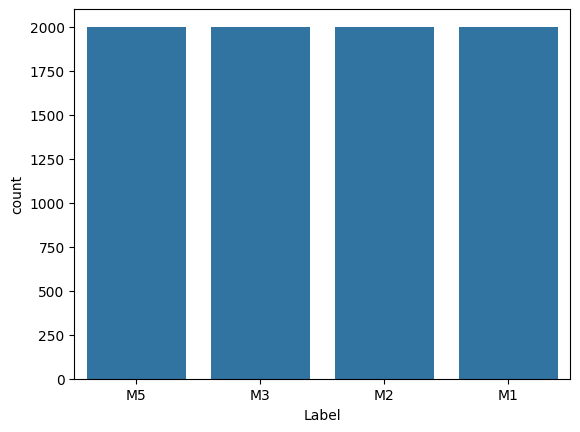

In [ ]:
import seaborn as sns
sns.countplot(data=data,x='Label')

<ipython-input-9-4ff03f9c9bca>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_Class=pd.value_counts(data["Label"], sort= True)


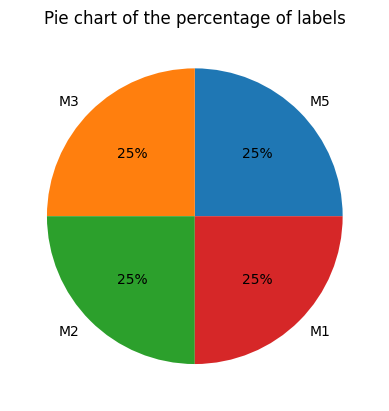

In [ ]:
#تعیین درصد لیبل ها
import matplotlib.pyplot as plt
count_Class=pd.value_counts(data["Label"], sort= True)
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart of the percentage of labels')
plt.ylabel('')
plt.show()

In [ ]:
X=data.drop(['Label'], axis = 1)
y=data.Label.values
print(f"Shape Data:",X.shape)
print(f"Shape Label:",y.shape)
print(f"Format and element of Label is:",set(y))

Shape Data: (8000, 102)
Shape Label: (8000,)
Format and element of Label is: {'M5', 'M1', 'M2', 'M3'}


In [ ]:
# Step 2 - Convert Label to number
from sklearn.preprocessing import LabelEncoder
labelEncoder_Label =  LabelEncoder() #from sklearn
y = labelEncoder_Label.fit_transform(y)
print(f"Format and element of Label is:",set(y))

Format and element of Label is: {0, 1, 2, 3}


# ANN

In [ ]:
#Import the libraries for neural networks
from time import perf_counter
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adagrad

In [ ]:
# Hold-out validation

# first one
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state = 1)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1,stratify=y_train, random_state=15)
#stratify=y_trainدر اینجا چون نسبتلیبل ها نا متقارن است از طبقه بندی داده ها استفاده کردیم
print("shape of X_train is : ",X_train.shape)
print("shape of X_test is : ",X_test.shape)
print("shape of X_valid is : ",X_valid.shape)

print("shape of y_train is : ",y_train.shape)
print("shape of y_test is : ",y_test.shape)
print("shape of y_valid is : ",y_valid.shape)

shape of X_train is :  (6480, 102)
shape of X_test is :  (800, 102)
shape of X_valid is :  (720, 102)
shape of y_train is :  (6480,)
shape of y_test is :  (800,)
shape of y_valid is :  (720,)


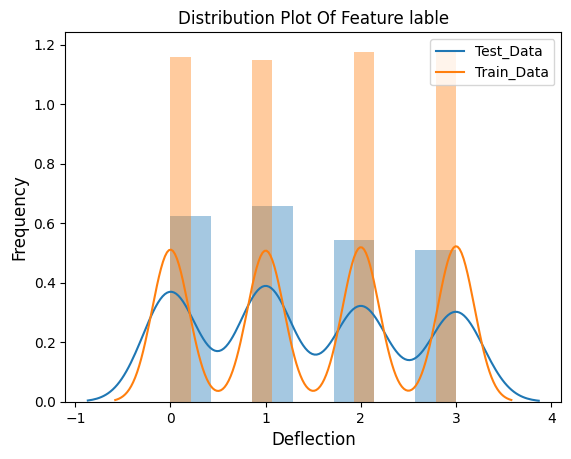

<Figure size 640x480 with 0 Axes>

In [ ]:
#نمودار توزیع داده چگالی وارده برای تست و ترین
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data1 =y_test
data2 =y_train
res = sn.distplot(data1)
res2 = sn.distplot(data2)
plt.xlabel('Deflection',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Distribution Plot Of Feature lable')
plt.legend(['Test_Data', 'Train_Data'])
plt.show()
plt.savefig('Distribution Plot of Feature lable.eps',format='eps')
plt.savefig('Distribution Plot of Feature lable.svg',format='svg')

In [ ]:
n_classes = len(set(y_train))#تعداد کلاس ها با توجه به تنوع لیبل ها
n_samples, n_features = X_train.shape#تعداد سطر و تعداد ستون های ماتریس ترین

In [ ]:
#Definition of swish activation function with Beta parameter
def swish_beta(x, beta=1.328):
    return x * (1 / (1 + tf.exp(-beta * x)))

In [ ]:
# Building the neural network (Functional API)
##define input layer
input_layer = Input(shape=(n_features,), name='input_layer')

##Defining 2 hidden layers
Layer_1 = Dense(20, activation=None, name='Layer_1')(input_layer)
S1=tf.keras.layers.Lambda(swish_beta)(Layer_1)
Layer_2 = Dense(40, activation=None, name='Layer_2')(S1)
S2=tf.keras.layers.Lambda(swish_beta)(Layer_2)
Layer_3 = Dense(20, activation=None, name='Layer_3')(S2)
S3=tf.keras.layers.Lambda(swish_beta)(Layer_3)
##Defining  output layer y1
output = Dense(n_classes, activation="softmax", name='output')(S3)

##Defining the model by specifying the input and output layers
fc_model = Model(inputs=input_layer, outputs=output)

In [ ]:
fc_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 102)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_1 (Dense)                      │ (None, 20)                  │           2,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_4 (Lambda)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_2 (Dense)                      │ (None, 40)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_5 (Lambda)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_3 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_6 (Lambda)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │              84 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,804 (14.86 KB)

 Trainable params: 3,804 (14.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#model compile
#metric = tf.keras.metrics.SparseCategoricalAccuracy()
#metric=tf.keras.metrics.SparseCategoricalAccuracy(
 #   name="sparse_categorical_accuracy", dtype=None)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.97,
    beta_2=0.998,
    epsilon=1e-07)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
fc_model.compile(loss=loss,optimizer=opt,metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
#model fit and prdict

start_tra = perf_counter()

history = fc_model.fit(X_train, y_train, epochs=3000, verbose=True,
          batch_size=2000, validation_data=(X_valid, y_valid))


end_tra = perf_counter()
print(f'train phase time with ANN: ', round((end_tra-start_tra), 1))

Streaming output truncated to the last 5000 lines.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1275 - sparse_categorical_accuracy: 0.6861 - val_loss: 1.1408 - val_sparse_categorical_accuracy: 0.6958
Epoch 502/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1272 - sparse_categorical_accuracy: 0.6885 - val_loss: 1.1396 - val_sparse_categorical_accuracy: 0.6903
Epoch 503/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1252 - sparse_categorical_accuracy: 0.6835 - val_loss: 1.1384 - val_sparse_categorical_accuracy: 0.6736
Epoch 504/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1244 - sparse_categorical_accuracy: 0.6676 - val_loss: 1.1378 - val_sparse_categorical_accuracy: 0.6639
Epoch 505/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.1268 - sparse_categorical_accuracy: 0.6666 - val_loss: 1.1371 - val_sparse_categorical_accuracy: 0.6736
Epoch 506/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1214 - sparse_categorical_accuracy: 0.6804 - val_loss: 1.1374 - va

In [ ]:
import matplotlib.pyplot as plt

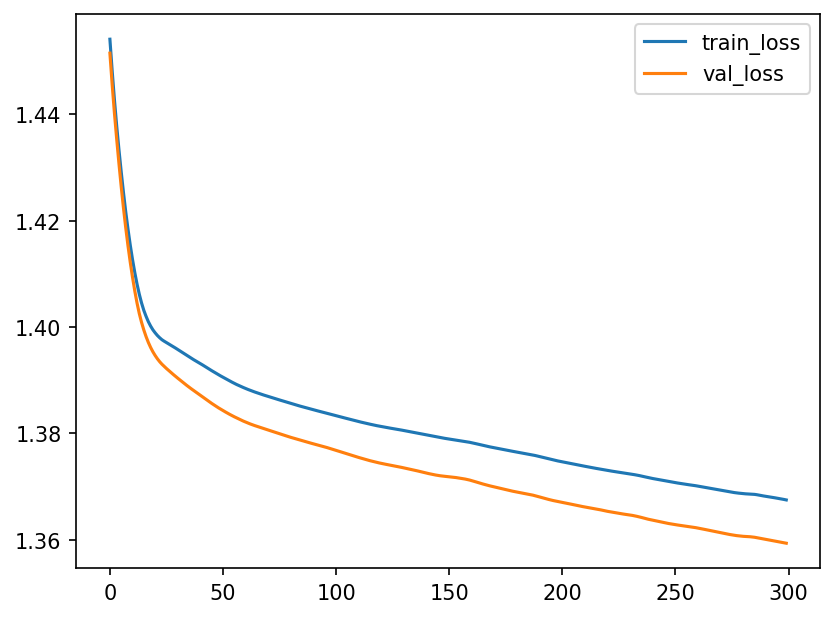

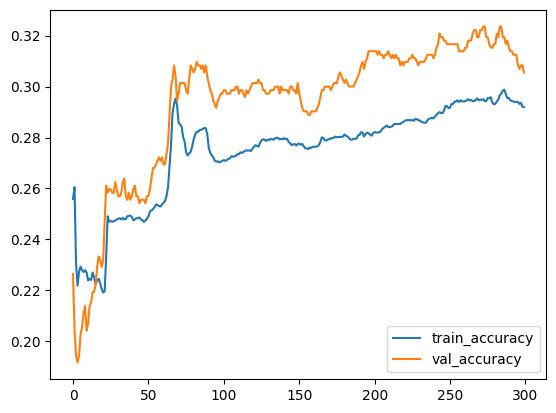

In [ ]:
plt.figure(dpi=150)
# plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()
plt.savefig('Train loss vs Validation loss.png', format='png')  # save plot to png


plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['train_accuracy', 'val_accuracy'])
plt.savefig('Train acc vs Validation accuracy.png', format='png')  # save plot to png

In [ ]:
# validate the network
score=fc_model.evaluate(X_valid,y_valid)
val_loss=score[0]
val_acc=score[1]
print('validation of loss is :',val_loss)
print('validation of  accuracy is :',val_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.3609 - sparse_categorical_accuracy: 0.2926
validation of loss is : 1.35934579372406
validation of  accuracy is : 0.3055555522441864


In [ ]:
fc_model.evaluate(X_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3552 - sparse_categorical_accuracy: 0.3053 


[1.3606407642364502, 0.2849999964237213]

In [ ]:
y_pred = fc_model.predict(X_test)

y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels, num_classes=n_classes)
print(cm)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
tf.Tensor(
[[ 42  16  23 133]
 [ 58  36  21 110]
 [ 21  11  40 114]
 [ 39  15  11 110]], shape=(4, 4), dtype=int32)


In [ ]:
y_pred = np.argmax(fc_model.predict(X_test), axis=1)

# Calculate the precision
precision = precision_score(y_test, y_pred, labels=np.unique(y_test), average='micro')
f1_score_value =f1_score(y_test, y_pred, labels=np.unique(y_test), average='micro')
recall_score_value =recall_score(y_test, y_pred, labels=np.unique(y_test), average='micro')
accuracy_score_value = accuracy_score(y_test, y_pred)
print('Precision:', precision)
print('f1_score_value:', f1_score_value)
print('recall_score_value:', recall_score_value)
print('Accuracy_score_value:', accuracy_score_value)


In [ ]:
#classification_report

from sklearn.metrics import classification_report
precision = precision_score(y_test, y_pred, labels=np.unique(y_test), average=None)
f1_score_value =f1_score(y_test, y_pred, labels=np.unique(y_test), average=None)
recall_score_value =recall_score(y_test, y_pred, labels=np.unique(y_test), average=None)
accuracy_score_value = accuracy_score(y_test, y_pred)
target_names = ['M1', 'M2', 'M3','M5']
print(classification_report(y_test, y_pred, target_names=target_names))

In [48]:
# Create a DataFrame with the metrics
metrics = {
    'Metrics': ['M1', 'M2', 'M3', 'M5', 'Average'],
    'Precision': [precision[0], precision[1], precision[2], precision[3], np.mean(precision)],
    'Recall': [recall_score_value[0], recall_score_value[1], recall_score_value[2], recall_score_value[3], np.mean(recall_score_value)],
    'F1-score': [f1_score_value[0], f1_score_value[1], f1_score_value[2], f1_score_value[3], np.mean(f1_score_value)],
    'Accuracy': ['', '', '', '', accuracy_score_value]
}

df = pd.DataFrame(metrics)

# Print the DataFrame
print(df)



   Metrics  Precision    Recall  F1-score Accuracy
0       M1   0.772512  0.761682  0.767059         
1       M2   0.822335  0.720000  0.767773         
2       M3   0.824121  0.881720  0.851948         
3       M5   0.761658  0.840000  0.798913         
4  Average   0.795156  0.800851  0.796423    0.795


In [47]:
# Create a DataFrame with the metrics
metrics = {
    'Metrics': ['M1', 'M2', 'M3', 'M5',  'Average'],
    'Precision': [precision[0], precision[1], precision[2], precision[3],  np.mean(precision)],
    'Recall': [recall_score_value[0], recall_score_value[1], recall_score_value[2], recall_score_value[3],  np.mean(recall_score_value)],
    'F1-score': [f1_score_value[0], f1_score_value[1], f1_score_value[2], f1_score_value[3], np.mean(f1_score_value)],
    'Accuracy': ['', '', '', '',  accuracy_score_value]
}

df = pd.DataFrame(metrics)
print(df)

   Metrics  Precision    Recall  F1-score Accuracy
0       M1   0.772512  0.761682  0.767059         
1       M2   0.822335  0.720000  0.767773         
2       M3   0.824121  0.881720  0.851948         
3       M5   0.761658  0.840000  0.798913         
4  Average   0.795156  0.800851  0.796423    0.795


Text(101.44444444444443, 0.5, 'Actual')

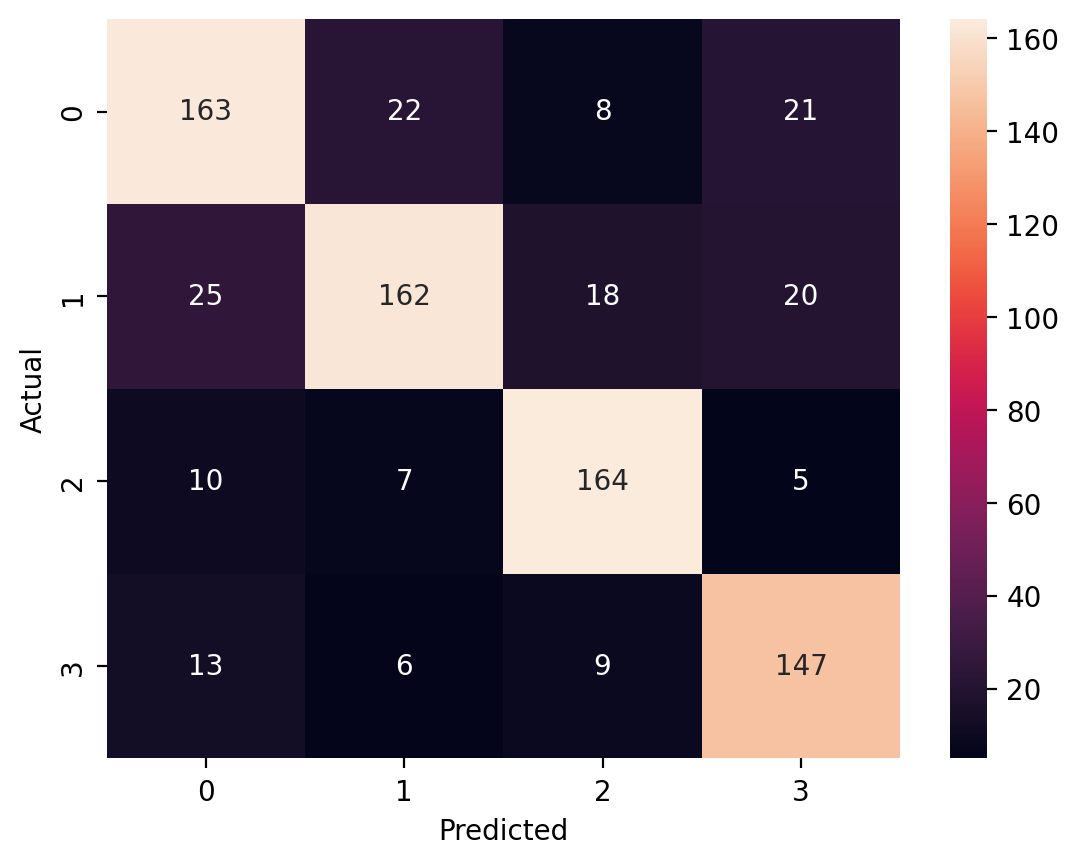

In [40]:
plt.figure(dpi=200)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")